# HW5 - Feature Engineering (FE) & EDA Assignment
* __Zhenyu Wang__
* __UNI: zw2847__

# Table of Contents
- [Section 1: Data Preparation](#section-1-data-preparation)


- [Section 2: Initial Observations](#section-2-initial-observations)


- [Section 3: Feature Engineering (Improved Features)](#section-3-feature-engineering)
  - [Feature 1: Transaction Count by Cardholder](#feature-1)
  - [Feature 2: Transaction Amount Categories](#feature-2)
  - [Feature 3: Transaction Frequency by Day of the Week](#feature-3)
  - [Feature 4: Transaction Amount per Vendor](#feature-4)
  - [Feature 5: Transaction Vendor Popularity](#feature-5)
  - [Feature 6: Transaction Amount per Merchant Category](#feature-6)
  - [Feature 7: Transaction Amount vs. Transaction Count Ratio](#feature-7)
  - [Feature 8: Transaction Amount vs. Vendor Popularity Ratio](#feature-8)
  - [Feature 9: Transaction Amount vs. Merchant Category Ratio](#feature-9)
  - [Feature 10: Transaction Frequency by Month](#feature-10)
  - [Feature 11: Transaction Amount vs. Month Ratio](#feature-11)
  - [Feature 12: Transaction Amount vs. Day of the Week Ratio](#feature-12)
  - [Feature 13: Transaction Amount vs. Year Ratio](#feature-13)
  - [Feature 14: Transaction Amount vs. Transaction Type Ratio](#feature-14)
  - [Feature 15: Transaction Amount vs. Merchant Category Median Ratio](#feature-15)
  

- [Section 4: Using HBOs (Histogram-Based Outlier Score)](#section-4)


- [Section 5:  Using ECODs (Elliptic Envelope for Cluster-Based Outlier Detection)](#section-5)
  
## Section 1: Data Preparation <a class="anchor" id="section-1-data-preparation"></a>

> Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> Load the dataset

In [2]:
df = pd.read_csv('purchase_credit_card.csv')
df.head()

Year-Month  Agency Number                Agency Name Cardholder Last Name  \
0      201307           1000  OKLAHOMA STATE UNIVERSITY                Mason   
1      201307           1000  OKLAHOMA STATE UNIVERSITY                Mason   
2      201307           1000  OKLAHOMA STATE UNIVERSITY               Massey   
3      201307           1000  OKLAHOMA STATE UNIVERSITY               Massey   
4      201307           1000  OKLAHOMA STATE UNIVERSITY        Mauro-Herrera   

  Cardholder First Initial                   Description  Amount  \
0                        C              GENERAL PURCHASE  890.00   
1                        C                  ROOM CHARGES  368.96   
2                        J              GENERAL PURCHASE  165.82   
3                        T              GENERAL PURCHASE   96.39   
4                        M  HAMMERMILL COPY PLUS COPY EA  125.96   

           Vendor        Transaction Date             Posted Date  \
0           NACAS  07/30/2013 12:00:00 AM  07/31/2013 12:00:00 AM   
1  SHERATON HOTEL  07/30/2013 12:00:00 AM  07/31/2013 12:00:00 AM   
2  SEARS.COM 9300  07/29/2013 12:00:00 AM  07/31/2013 12:00:00 AM   
3  WAL-MART #0137  07/30/2013 12:00:00 AM  07/31/2013 12:00:00 AM   
4  STAPLES DIRECT  07/30/2013 12:00:00 AM  07/31/2013 12:00:00 AM   

                        Merchant Category Code (MCC)  
0        CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS  
1                                           SHERATON  
2  DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...  
3                    GROCERY STORES,AND SUPERMARKETS  
4  STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...

> Display basic information about the dataset

In [3]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442458 entries, 0 to 442457
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Year-Month                    442458 non-null  int64  
 1   Agency Number                 442458 non-null  int64  
 2   Agency Name                   442458 non-null  object 
 3   Cardholder Last Name          442458 non-null  object 
 4   Cardholder First Initial      442458 non-null  object 
 5   Description                   442458 non-null  object 
 6   Amount                        442458 non-null  float64
 7   Vendor                        442458 non-null  object 
 8   Transaction Date              442458 non-null  object 
 9   Posted Date                   442458 non-null  object 
 10  Merchant Category Code (MCC)  442458 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 37.1+ MB
None


> Summary statistics
- Dataset shape is 442358 x 11, and print the column name

In [4]:
print("Summary Statistics:")
print(df.shape)
print(df.columns)
print(df.describe()) 

Summary Statistics:
(442458, 11)
Index(['Year-Month', 'Agency Number', 'Agency Name', 'Cardholder Last Name',
       'Cardholder First Initial', 'Description', 'Amount', 'Vendor',
       'Transaction Date', 'Posted Date', 'Merchant Category Code (MCC)'],
      dtype='object')
          Year-Month  Agency Number        Amount
count  442458.000000  442458.000000  4.424580e+05
mean   201357.284375   42785.860353  4.249912e+02
std        47.107417   33378.461293  5.266509e+03
min    201307.000000    1000.000000 -4.286304e+04
25%    201309.000000    1000.000000  3.091000e+01
50%    201401.000000   47700.000000  1.048900e+02
75%    201404.000000   76000.000000  3.450000e+02
max    201406.000000   98000.000000  1.903858e+06


> Check for missing values 

In [5]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Year-Month                      0
Agency Number                   0
Agency Name                     0
Cardholder Last Name            0
Cardholder First Initial        0
Description                     0
Amount                          0
Vendor                          0
Transaction Date                0
Posted Date                     0
Merchant Category Code (MCC)    0
dtype: int64


> Change column names

In [6]:
df.columns = ['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name', 'Cardholder_First_Initial', 
              'Description', 'Amount', 'Vendor', 'Transaction_Date', 'Posted_Date', 'Merchant_Category']

> Create date fields
- Creating separate Year and Month columns for future feature engineering
- Converting Transaction_Date and Posted_date from Python Object data type to datetime

In [7]:
df['Transaction_Date']=pd.to_datetime(df['Transaction_Date'])
df['Posted_Date']=pd.to_datetime(df['Posted_Date'])

df['Year_Month'].dtype
df['Year_Month']=pd.to_datetime(df['Year_Month'], format='%Y%m')
df['Year'] = df['Year_Month'].dt.year
df['Month'] = df['Year_Month'].dt.month
#Creating 'Week_Number' from 'Transaction_Date'
df['Week_Number'] = df['Transaction_Date'].dt.isocalendar().week

#Creating 'Day_of_Week' from 'Transaction_Date'
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['Day_of_Week'] = df['Transaction_Date'].dt.dayofweek.map(dayOfWeek)

df['Day_of_Week'].value_counts()

Wednesday    89644
Thursday     87537
Tuesday      86919
Friday       79917
Monday       61809
Saturday     26307
Sunday       10325
Name: Day_of_Week, dtype: int64

- Transaction Amount per Merchant Category: Calculate the average transaction amount for each merchant category.

In [8]:
category_avg_amount = df.groupby('Merchant_Category')['Amount'].mean().reset_index()
category_avg_amount.columns = ['Merchant_Category', 'Avg_Transaction_Amount_Merchant_Category']
df = pd.merge(df, category_avg_amount, on='Merchant_Category', how='left')

- Transaction Amount per Vendor: Calculate the average transaction amount for each vendor.

In [9]:
vendor_avg_amount = df.groupby('Vendor')['Amount'].mean().reset_index()
vendor_avg_amount.columns = ['Vendor', 'Avg_Transaction_Amount_Vendor']
df = pd.merge(df, vendor_avg_amount, on='Vendor', how='left')

- Transaction Vendor Popularity: Calculate the popularity of each vendor by counting the number of transactions with that vendor. 

In [10]:
vendor_popularity = df['Vendor'].value_counts().reset_index()
vendor_popularity.columns = ['Vendor', 'Transaction_Count_Vendor']
df = pd.merge(df, vendor_popularity, on='Vendor', how='left')

- Transaction Frequency: Count the number of transactions for each cardholder to understand their transaction behavior.

In [11]:
cardholder_transaction_counts = df['Cardholder_Last_Name'].value_counts().reset_index()
cardholder_transaction_counts.columns = ['Cardholder_Last_Name', 'Transaction_Count_Cardholder']
df = pd.merge(df, cardholder_transaction_counts, on='Cardholder_Last_Name', how='left')

- Transaction Amount Categories: Create categories for transaction amounts, such as "Low," "Medium," and "High," based on ranges below.
- low: < 100 dollars
- medium: 100 <= and < 500 dollars
- high: >= 500 dollars

In [12]:
def categorize_amount(amount):
    if amount < 100:
        return 'Low'
    elif 100 <= amount < 500:
        return 'Medium'
    else:
        return 'High'

df['Transaction_Amount_Category'] = df['Amount'].apply(categorize_amount)

## Section 2: Initial Observations <a class="anchor" id="section-2-initial-observations"></a>

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

> Average Transaction Amount per Vendor:
- This bar plot displays the average transaction amount for the top 10 vendors. From the chart, we can see that "NACAS" ranks 1st in terms of the highest average transaction amount, followed by "Kyocera Document Solutions" which is ranked 2nd. "Sheraton Hotel" takes the third position. And is valuable for quickly identifying the top 10 vendors with the highest average transaction amounts. It provides insights into which vendors tend to have larger transactions, which can be essential for vendor performance analysis and decision-making.

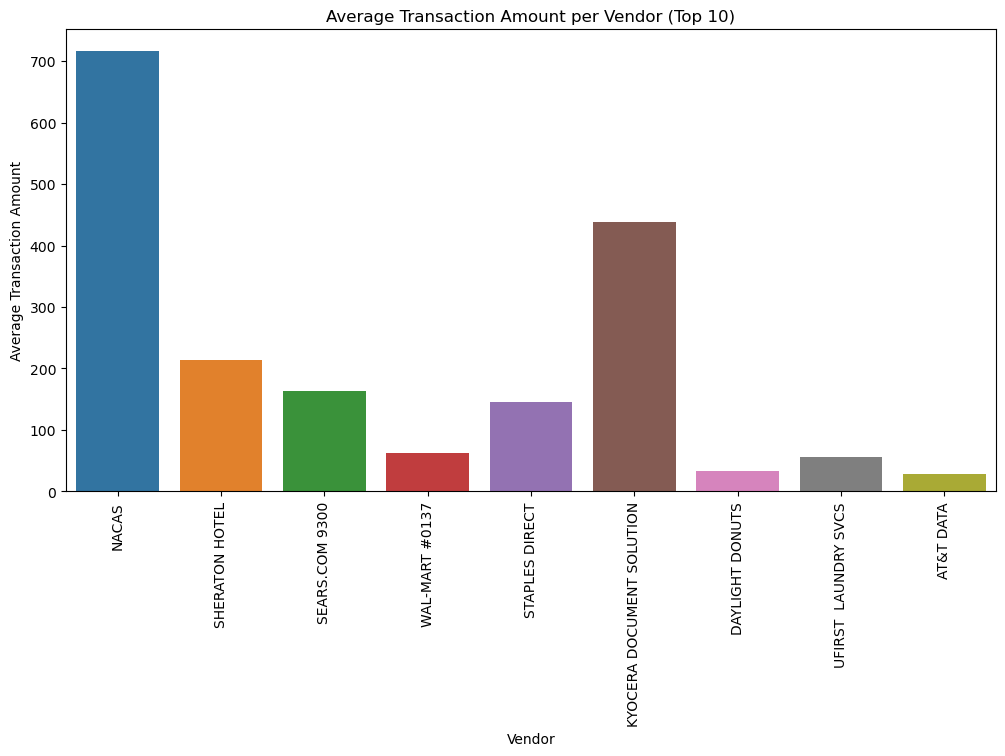

In [14]:
# Create a bar plot to visualize average transaction amount per vendor
plt.figure(figsize=(12, 6))
sns.barplot(x='Vendor', y='Avg_Transaction_Amount_Vendor', data=df.head(10))
plt.xticks(rotation=90)
plt.title('Average Transaction Amount per Vendor (Top 10)')
plt.xlabel('Vendor')
plt.ylabel('Average Transaction Amount')
plt.show()

>  Transaction Vendor Popularity:
- This bar plot provides a visual representation of the transaction count for the top 10 vendors, giving insights into their popularity among cardholders. According to the chart, "AT&T Data" is the most popular vendor, ranking 1st in terms of the highest transaction count. "Walmart" takes the 2nd position, and "Staples Direct" is ranked 3rd. By examining this chart, we can quickly identify the top 10 vendors with the highest transaction counts, which is valuable for understanding cardholder spending patterns and vendor preferences.

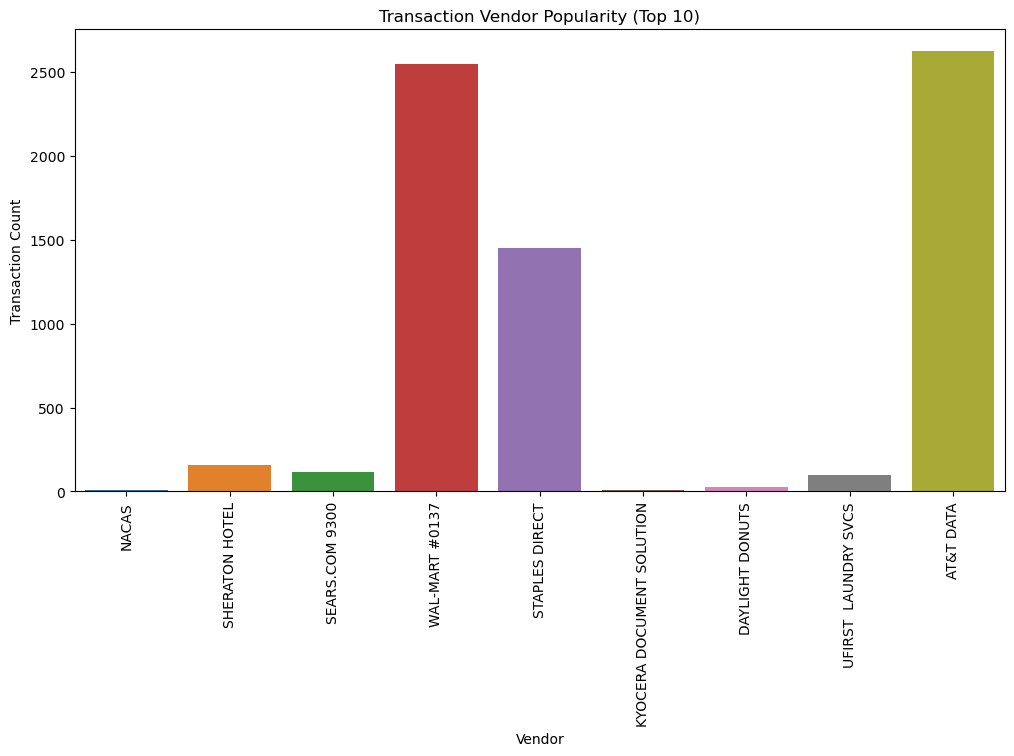

In [15]:
# Create a bar plot to visualize transaction count per vendor (top 10 vendors)
plt.figure(figsize=(12, 6))
sns.barplot(x='Vendor', y='Transaction_Count_Vendor', data=df.head(10))
plt.xticks(rotation=90)
plt.title('Transaction Vendor Popularity (Top 10)')
plt.xlabel('Vendor')
plt.ylabel('Transaction Count')
plt.show()

> Transaction Amount Categories:
- This count plot effectively visualizes the distribution of transaction amount categories, namely "Low", "Medium" and "High". "Low" includes transactions with relatively small amounts (less than 100), often comprising everyday expenses. "Medium" encompasses moderately-sized transactions (from 100 to 500). "High" consists of larger transactions (500 or more). It provides valuable insights into the frequency of transactions within each category. From the chart, we can observe that the majority of transactions fall into the "Low" category, comprising nearly half of all transactions. The "Medium" category follows, indicating a moderate frequency of transactions. In contrast, the "High" category represents the least frequent transactions, with a count of less than 100,000.

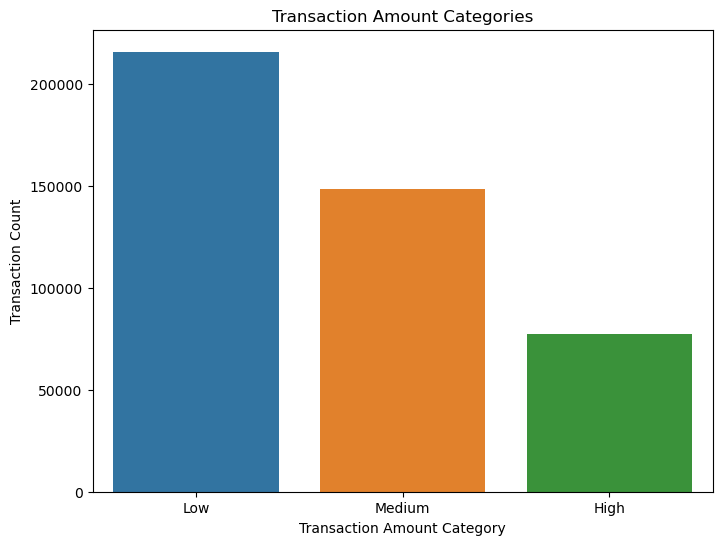

In [16]:
# Create a count plot to visualize the distribution of transaction amount categories
plt.figure(figsize=(8, 6))
sns.countplot(x='Transaction_Amount_Category', data=df, order=['Low', 'Medium', 'High'])
plt.title('Transaction Amount Categories')
plt.xlabel('Transaction Amount Category')
plt.ylabel('Transaction Count')
plt.show()

> Transaction Amount by Day of the Week:
- This box plot illustrates the distribution of transaction amounts for each day of the week. The x-axis represents the days of the week, while the y-axis represents transaction amounts. This plot is particularly useful for identifying any anomalies or unusual patterns in spending behavior based on the day of the week. By analyzing the spread and central tendency of transaction amounts across different days, we can detected potential outliers in WED, THUR, FRI, which have a few large amount spending Occured.

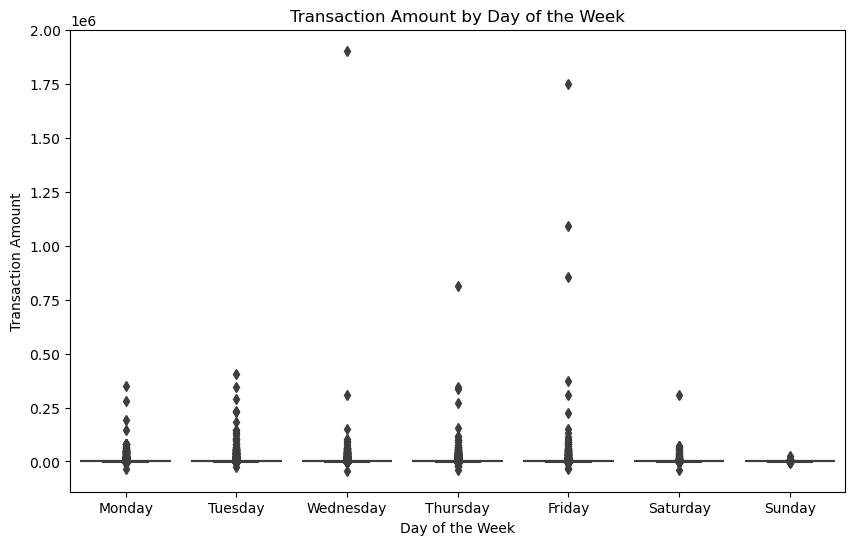

In [17]:
# Create a box plot to visualize transaction amounts by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_Week', y='Amount', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Transaction Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Amount')
plt.show()

> Transaction Frequency by Month:
- This count plot displays the transaction frequency for each month, providing insights into how the number of transactions varies throughout the year. By examining the distribution of transaction counts across months, we can identify the patterns in spending behavior. Which can better help us finding the anomalies.

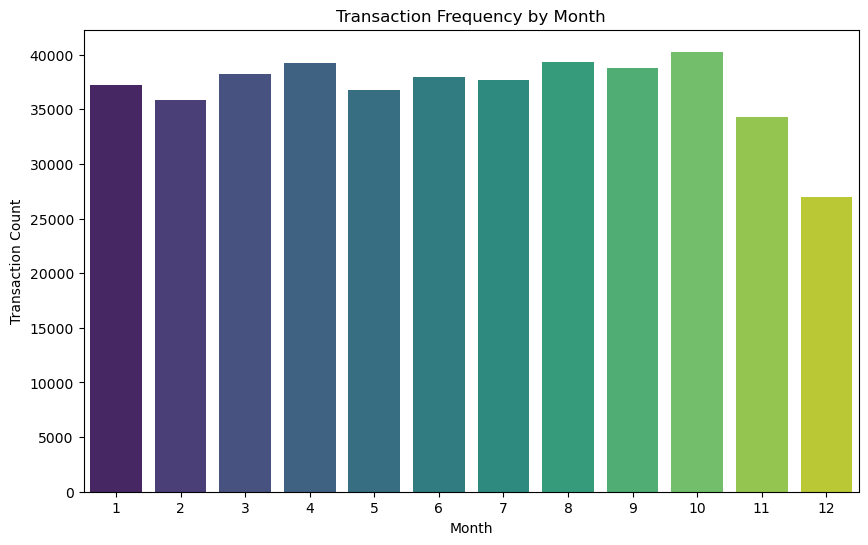

In [18]:
# Create a count plot to visualize transaction frequency by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='viridis')
plt.title('Transaction Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

> Transaction Amount by Agency:
- This bar plot displays the total transaction amount for the top 10 agencies. It helps us identify which agencies have the highest total spending.

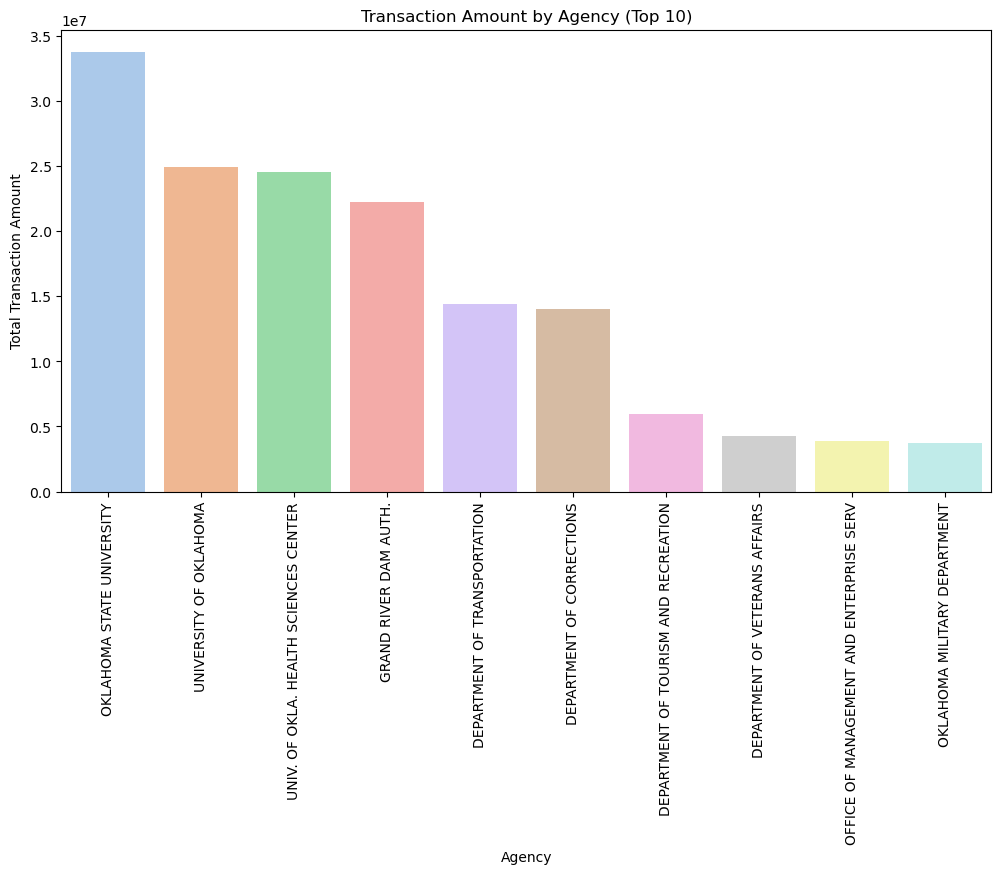

In [19]:
# Create a bar plot to visualize transaction amounts by agency (top 10 agencies)
plt.figure(figsize=(12, 6))
sns.barplot(x='Agency_Name', y='Amount', data=df.groupby('Agency_Name')['Amount'].sum().reset_index().nlargest(10, 'Amount'), palette='pastel')
plt.title('Transaction Amount by Agency (Top 10)')
plt.xlabel('Agency')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=90)
plt.show()

> Transaction Amount by Merchant Category:
- This bar plot presents the total transaction amount for the top 10 merchant categories, helping us identify which categories account for the highest spending.

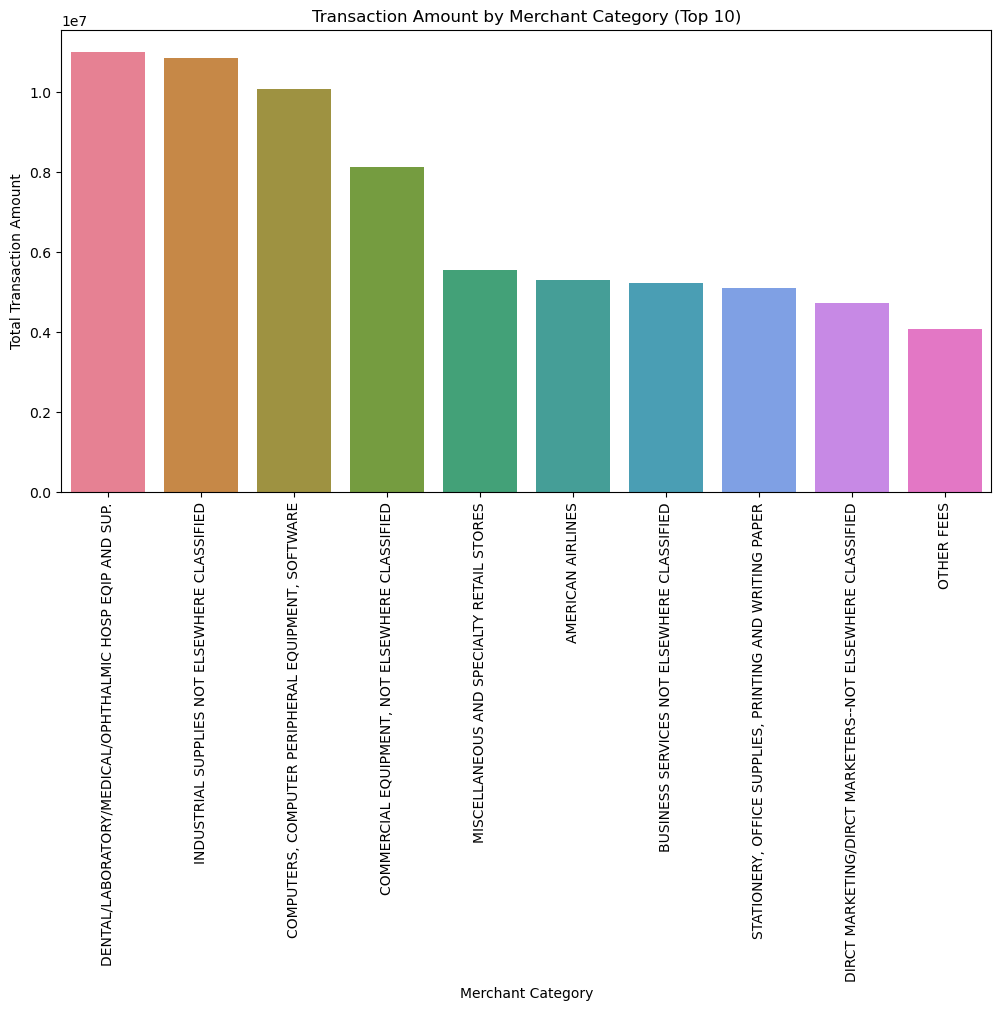

In [20]:
# Create a bar plot to visualize transaction amounts by merchant category (top 10 categories)
plt.figure(figsize=(12, 6))
sns.barplot(x='Merchant_Category', y='Amount', data=df.groupby('Merchant_Category')['Amount'].sum().reset_index().nlargest(10, 'Amount'), palette='husl')
plt.title('Transaction Amount by Merchant Category (Top 10)')
plt.xlabel('Merchant Category')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=90)
plt.show()


> Transaction Amount vs. Day of the Week and Transaction Amount Category:
- This grouped bar plot allows to compare transaction amounts by day of the week while distinguishing between different transaction amount categories (Low, Medium, High).

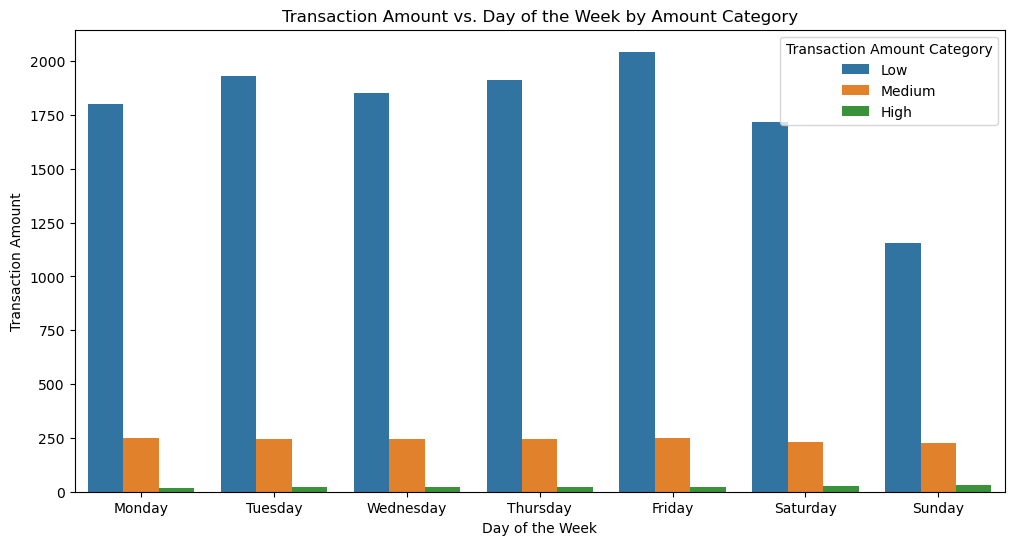

In [21]:
# Create a grouped bar plot to compare transaction amounts by day of the week and transaction amount category
plt.figure(figsize=(12, 6))
sns.barplot(x='Day_of_Week', y='Amount', hue='Transaction_Amount_Category', data=df, ci=None, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Transaction Amount vs. Day of the Week by Amount Category')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Amount')
plt.legend(title='Transaction Amount Category', loc='upper right', labels=['Low', 'Medium', 'High'])
plt.show()

> Transaction Frequency by Month:
- This line plot displays the transaction frequency over time, specifically by month. 

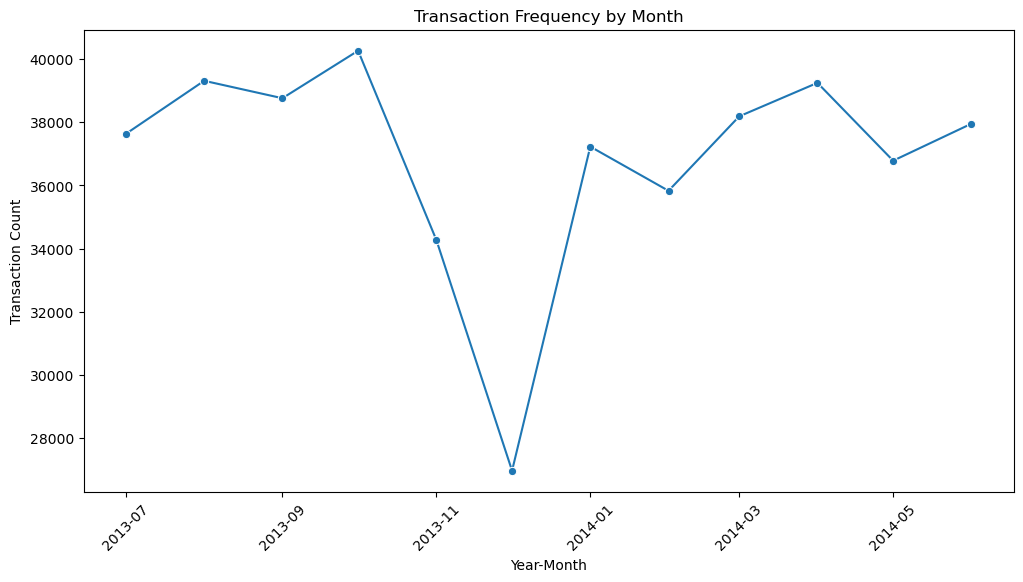

In [22]:
# Create a line plot to visualize transaction frequency by month
monthly_transaction_counts = df.groupby('Year_Month')['Amount'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Month', y='Amount', data=monthly_transaction_counts, marker='o', palette='pastel')
plt.title('Transaction Frequency by Month')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()

## Section 3: Feature Engineering <a class="anchor" id="section-3-feature-engineering"></a>

> __Feature 1<a class="anchor" id="feature-1"></a>:__ Transaction Count by Cardholder - `Transaction_Count_Cardholder`
- This feature quantifies how frequently each cardholder conducts transactions. By comparing an individual cardholder's transaction count to the average count for all cardholders, we can identify those whose transaction behavior significantly differs from the norm. Deviations may signal potential anomalies, such as a sudden spike in transactions by a single cardholder, potentially indicative of fraudulent activity.

In [23]:
cardholder_transaction_counts = df['Cardholder_Last_Name'].value_counts().reset_index()
cardholder_transaction_counts.columns = ['Cardholder_Last_Name', 'Transaction_Count_Cardholder']

> __Feature 2<a class="anchor" id="feature-2"></a>:__ Transaction Amount Categories: `Transaction_Amount_Category`
- Categorizing transactions into "Low," "Medium," and "High" based on predefined thresholds provides an overview of transaction patterns. Comparing the distribution of these categories to established benchmarks enables us to detect shifts in spending behavior. For instance, an unexpected surge in "High" transactions could be a red flag, prompting further investigation.

In [24]:
def categorize_amount(amount):
    if amount < 100:
        return 'Low'
    elif 100 <= amount < 500:
        return 'Medium'
    else:
        return 'High'

In [25]:
df['Transaction_Amount_Category'].value_counts()

Low       216011
Medium    148850
High       77597
Name: Transaction_Amount_Category, dtype: int64

> __Feature 3<a class="anchor" id="feature-3"></a>:__ Transaction Frequency by Day of the Week: `Day_of_Week`
- Analyzing transaction frequency patterns across days of the week helps identify unusual trends. Comparing daily transaction frequencies to benchmarks highlights days with atypical transaction behavior. Anomalies might include sudden spikes or drops in transactions on specific days, potentially indicating irregularities such as fraud or system glitches.

In [26]:
day_of_week_transaction_counts = df.groupby('Day_of_Week')['Transaction_Date'].count().reset_index()
day_of_week_transaction_counts.columns = ['Day_of_Week', 'Avg_Transaction_Count_Day_of_Week']
df['Day_of_Week']

0          Tuesday
1          Tuesday
2           Monday
3          Tuesday
4          Tuesday
            ...   
442453      Friday
442454      Friday
442455      Friday
442456    Thursday
442457      Friday
Name: Day_of_Week, Length: 442458, dtype: object

> __Feature 4<a class="anchor" id="feature-4"></a>:__ Transaction Amount per Vendor: `Avg_Transaction_Amount_Vendor`
- Explanation: Calculating the average transaction amount for each vendor allows us to assess vendor-specific spending behavior. By comparing these averages to the overall average transaction amount, we can pinpoint vendors with transactions deviating significantly from the norm. Unusually high or low averages may suggest anomalies, like overcharging or discounts.

In [27]:
vendor_avg_amount = df.groupby('Vendor')['Amount'].mean().reset_index()
vendor_avg_amount.columns = ['Vendor', 'Avg_Transaction_Amount_Vendor']
df["Avg_Transaction_Amount_Vendor"]

0          715.555556
1          214.383270
2          163.750339
3           62.405600
4          144.875697
             ...     
442453    5460.217273
442454    1307.045455
442455     247.244264
442456    1830.477778
442457    7521.371220
Name: Avg_Transaction_Amount_Vendor, Length: 442458, dtype: float64

> __Feature 5<a class="anchor" id="feature-5"></a>:__ Transaction Vendor Popularity: `Transaction_Count_Vendor`
- This feature quantifies the popularity of each vendor based on transaction counts. Comparing vendor transaction counts to benchmarks helps identify vendors that are unusually popular or unpopular. Anomalies may arise from vendors with transaction counts significantly different from the expected, such as a sudden surge in transactions with an obscure vendor, potentially warranting investigation.

In [28]:
vendor_popularity = df['Vendor'].value_counts().reset_index()
vendor_popularity.columns = ['Vendor', 'Transaction_Count_Vendor']
df['Transaction_Count_Vendor']

0            9
1          159
2          118
3         2548
4         1450
          ... 
442453      11
442454      44
442455     258
442456      27
442457      41
Name: Transaction_Count_Vendor, Length: 442458, dtype: int64

> __Feature 6<a class="anchor" id="feature-6"></a>:__ Transaction Amount per Merchant Category: `Avg_Transaction_Amount_Merchant_Category`
- Assessing average transaction amounts within merchant categories reveals spending patterns. By comparing these averages to the overall average, we can identify categories with transactions deviating significantly from the norm. Unexpectedly high spending in a particular category may be indicative of anomalies, such as unusual expenses or targeted spending.

In [29]:
category_avg_amount = df.groupby('Merchant_Category')['Amount'].mean().reset_index()
category_avg_amount.columns = ['Merchant_Category', 'Avg_Transaction_Amount_Merchant_Category']
df['Avg_Transaction_Amount_Merchant_Category']

0         480.051482
1         389.172289
2         676.519181
3          74.121967
4         204.915215
             ...    
442453    725.072467
442454    633.644908
442455    514.318754
442456    647.994093
442457    417.178636
Name: Avg_Transaction_Amount_Merchant_Category, Length: 442458, dtype: float64

> __Feature 7<a class="anchor" id="feature-7"></a>:__ Transaction Amount vs. Transaction Count Ratio: `Transaction_Amount_to_Count_Ratio`
- This ratio examines how transaction amount correlates with transaction count. By comparing the distribution of these ratios to benchmarks for different groups of individuals, we can identify unusual patterns. For instance, a high spending per transaction ratio for infrequent shoppers may suggest anomalies, like luxury purchases by typically low-spending individuals.

In [30]:
df['Transaction_Amount_to_Count_Ratio'] = df['Amount'] / df['Transaction_Count_Cardholder']
df['Transaction_Amount_to_Count_Ratio'].describe()

count    442458.000000
mean          4.790390
std         698.791181
min        -745.357143
25%           0.080901
50%           0.350977
75%           1.384149
max      317309.728333
Name: Transaction_Amount_to_Count_Ratio, dtype: float64

> __Feature 8<a class="anchor" id="feature-8"></a>:__ Transaction Amount vs. Vendor Popularity Ratio: `Transaction_Amount_to_Vendor_Ratio`
- Calculating the ratio of transaction amount to vendor popularity allows us to assess spending behavior relative to vendor popularity. Comparing this ratio to benchmarks highlights vendors with ratios significantly higher or lower than expected. Anomalies might include high ratios with unpopular vendors, possibly indicating irregular spending.

In [31]:
df['Transaction_Amount_to_Vendor_Ratio'] = df['Amount'] / df['Transaction_Count_Vendor']
df['Transaction_Amount_to_Vendor_Ratio'].describe()

count    442458.000000
mean         82.605180
std        1372.810293
min      -11369.333333
25%           0.058446
50%           1.257588
75%          20.000000
max      544590.000000
Name: Transaction_Amount_to_Vendor_Ratio, dtype: float64

> __Feature 9<a class="anchor" id="feature-9"></a>:__ Transaction Amount vs. Merchant Category Ratio: `Transaction_Amount_to_Category_Ratio`
- This ratio assesses how transaction amount correlates with merchant category. Comparing the distribution of these ratios to benchmarks for different merchant categories enables us to detect deviations from the expected. Unusually high ratios within specific categories may suggest anomalies, like targeted spending in a particular area.

In [32]:
df['Transaction_Amount_to_Category_Ratio'] = df['Amount'] / df['Avg_Transaction_Amount_Merchant_Category']
df['Transaction_Amount_to_Category_Ratio'].describe()

count    4.424580e+05
mean              NaN
std               NaN
min              -inf
25%      1.330033e-01
50%      4.023802e-01
75%      9.423533e-01
max               inf
Name: Transaction_Amount_to_Category_Ratio, dtype: float64

> __Feature 10<a class="anchor" id="feature-10"></a>:__ Transaction Frequency by Month: `Avg_Transaction_Count_Month`
- This feature calculates the number of transactions for each month. It helps identify seasonal or monthly trends in transaction frequency. Anomalies may be detected when there are significant deviations from the expected number of transactions for a particular month. For example, a sudden spike in transactions during an atypical month could be considered an anomaly.

In [33]:
monthly_transaction_counts = df.groupby('Month')['Transaction_Date'].count().reset_index()
monthly_transaction_counts.columns = ['Month', 'Avg_Transaction_Count_Month']
df = pd.merge(df, monthly_transaction_counts, on='Month', how='left')

> __Feature 11<a class="anchor" id="feature-11"></a>:__ Transaction Amount vs. Month Ratio: `Transaction_Amount_to_Month_Ratio`
- This ratio compares transaction amounts for each month to the overall average transaction amount. It allows to assess whether transaction amounts in a specific month significantly differ from the average. Anomalies may occur when the ratio deviates substantially from the expected value. For instance, if transaction amounts are consistently much higher in a particular month compared to the average, it could be flagged as an anomaly.

In [34]:
df['Transaction_Amount_to_Month_Ratio'] = df['Amount'] / df['Avg_Transaction_Count_Month']
df['Transaction_Amount_to_Month_Ratio'].describe()

count    442458.000000
mean          0.011511
std           0.136771
min          -1.122422
25%           0.000844
50%           0.002845
75%           0.009300
max          49.116619
Name: Transaction_Amount_to_Month_Ratio, dtype: float64

> __Feature 12<a class="anchor" id="feature-12"></a>:__ Transaction Amount vs. Day of the Week Ratio: `Transaction_Amount_to_Day_Ratio`
- This ratio evaluates how transaction amounts vary by day of the week. It helps in identifying spending patterns based on weekdays. Anomalies can be identified when the ratio of transaction amounts for a specific day of the week differs significantly from the expected ratio. For example, if Fridays typically have higher transaction amounts, but one Friday's ratio is much lower, it could indicate an anomaly. 

In [35]:
day_of_week_transaction_counts = df.groupby('Day_of_Week')['Transaction_Date'].count().reset_index()
day_of_week_transaction_counts.columns = ['Day_of_Week', 'Avg_Transaction_Count_Day_of_Week']
df = pd.merge(df, day_of_week_transaction_counts, on='Day_of_Week', how='left')
df['Transaction_Amount_to_Day_Ratio'] = df['Amount'] / df['Avg_Transaction_Count_Day_of_Week']
df['Transaction_Amount_to_Day_Ratio'].describe() 

count    442458.000000
mean          0.006128
std           0.067325
min          -1.463750
25%           0.000422
50%           0.001458
75%           0.004775
max          21.902474
Name: Transaction_Amount_to_Day_Ratio, dtype: float64

> __Feature 13<a class="anchor" id="feature-13"></a>:__ Transaction Amount vs. Year Ratio: `Transaction_Amount_to_Year_Ratio`
- This ratio examines transaction amounts relative to the year of the transaction. It allows you to spot year-specific spending trends. Anomalies may be detected when the ratio deviates significantly from the expected value for a particular year. For instance, if transaction amounts in a specific year are consistently much higher or lower than the average, it could indicate an anomaly.

In [36]:
year_transaction_counts = df.groupby('Year')['Transaction_Date'].count().reset_index()
year_transaction_counts.columns = ['Year', 'Avg_Transaction_Count_Year']
df = pd.merge(df, year_transaction_counts, on='Year', how='left')
df['Transaction_Amount_to_Year_Ratio'] = df['Amount'] / df['Avg_Transaction_Count_Year']
df['Transaction_Amount_to_Year_Ratio'].describe()

count    442458.000000
mean          0.001921
std           0.024080
min          -0.190302
25%           0.000140
50%           0.000473
75%           0.001554
max           8.764615
Name: Transaction_Amount_to_Year_Ratio, dtype: float64

> __Feature 14<a class="anchor" id="feature-14"></a>:__ Transaction Amount vs. Transaction Type Ratio: `Transaction_Amount_vs_Transaction_Type_Ratio`
-  This ratio analyzes how transaction amounts vary based on different transaction types. It assesses whether specific types of transactions, such as online purchases, in-person transactions, or cash advances, have significantly different average transaction amounts. Anomalies can be identified if certain transaction types consistently deviate from the expected transaction amount. For example, if online purchases tend to have unusually high transaction amounts, it could raise concerns.

In [37]:
# Calculate the average transaction amount for each transaction type
type_avg_amount = df.groupby('Description')['Amount'].mean().reset_index()
type_avg_amount.columns = ['Description', 'Avg_Transaction_Amount_Type']

# Merge the average transaction amount by type with the original dataframe
df = pd.merge(df, type_avg_amount, on='Description', how='left')

# Create the 'Transaction_Amount_vs_Transaction_Type_Ratio' feature
df['Transaction_Amount_vs_Transaction_Type_Ratio'] = df['Amount'] / df['Avg_Transaction_Amount_Type']
df['Transaction_Amount_vs_Transaction_Type_Ratio']

0          1.846395
1          1.067265
2          0.344010
3          0.199971
4          0.996235
            ...    
442453     2.058004
442454     5.010161
442455     0.368242
442456    67.335323
442457     9.779814
Name: Transaction_Amount_vs_Transaction_Type_Ratio, Length: 442458, dtype: float64

> __Feature 15<a class="anchor" id="feature-15"></a>:__ Transaction Amount vs. Merchant Category Median Ratio:`Transaction_Amount_vs_Merchant_Median_Ratio`
- This ratio examines the relationship between transaction amounts and the merchant category using the median transaction amount. It calculates the median transaction amount for each unique merchant category and compares it to the overall median transaction amount. Deviations from the median ratio can highlight specific merchant categories with unusually high or low transaction amounts compared to the overall median. Detecting such anomalies can help identify merchant categories that may have atypical transaction patterns, potentially indicating fraud or irregular spending behavior.

- Utilizing the median as the central measure makes this feature robust to outliers, as it is less affected by extreme values. This robustness is particularly valuable for anomaly detection, as extreme values in transaction amounts can skew the results and lead to false positives.

In [38]:
# Calculate the median transaction amount for each unique merchant category
median_amount_per_category = df.groupby('Merchant_Category')['Amount'].median().reset_index()
median_amount_per_category.columns = ['Merchant_Category', 'Median_Amount_Merchant_Category']

# Calculate the overall median transaction amount
overall_median_amount = df['Amount'].median()

# Create the 'Transaction_Amount_vs_Merchant_Median_Ratio' feature
df = pd.merge(df, median_amount_per_category, on='Merchant_Category', how='left')
df['Transaction_Amount_vs_Merchant_Median_Ratio'] = df['Amount'] / df['Median_Amount_Merchant_Category'] * 100

# Drop the intermediate 'Median_Amount_Merchant_Category' column
df.drop(columns=['Median_Amount_Merchant_Category'], inplace=True)

df['Transaction_Amount_vs_Merchant_Median_Ratio']

0           356.000000
1           147.998396
2            78.856762
3           262.214363
4           184.152047
              ...     
442453      519.290164
442454     1656.037852
442455      115.259740
442456    12982.800000
442457     4770.360251
Name: Transaction_Amount_vs_Merchant_Median_Ratio, Length: 442458, dtype: float64

### Quick summary of each feature and its potential relevance:
1. `Transaction_Count_Cardholder`: Captures the transaction count by each cardholder, allowing to identify anomalies in cardholder transaction behavior.

2. `Transaction_Amount_Category`: Categorizes transactions into "Low," "Medium," and "High" to detect shifts in spending behavior.

3. `Day_of_Week`: Examines transaction frequency patterns across days of the week, identifying unusual trends.

4. `Avg_Transaction_Amount_Vendor`: Calculates the average transaction amount for each vendor, allowing to assess vendor-specific spending behavior.

5. `Transaction_Count_Vendor`: Quantifies the popularity of each vendor based on transaction counts, helping identify unusually popular or unpopular vendors.

6. `Avg_Transaction_Amount_Merchant_Category`: Assesses average transaction amounts within merchant categories, revealing spending patterns.

7. `Transaction_Amount_to_Count_Ratio`: Examines how transaction amount correlates with transaction count, allowing for the detection of unusual patterns.

8. `Transaction_Amount_to_Vendor_Ratio`: Compares transaction amount to vendor popularity, identifying unusual spending relative to vendor popularity.

9. `Transaction_Amount_to_Category_Ratio`: Assesses transaction amount relative to the merchant category, detecting unusual spending in specific categories.

10. `Avg_Transaction_Count_Month`: Calculates the number of transactions for each month, helping identify seasonal or monthly trends.

11. `Transaction_Amount_to_Month_Ratio`: Compares transaction amounts for each month to the overall average transaction amount, allowing detection of deviations.

12. `Transaction_Amount_to_Day_Ratio`: Evaluates how transaction amounts vary by day of the week, helping identify atypical spending patterns on specific days.

13. `Transaction_Amount_to_Year_Ratio`: Examines transaction amounts relative to the year of the transaction, detecting year-specific spending trends.

14. `Transaction_Amount_vs_Transaction_Type_Ratio`: Analyzes transaction amounts based on different transaction types, helping identify unusual patterns in specific types.

15. `Transaction_Amount_vs_Merchant_Median_Ratio`: Compares transaction amounts to the median transaction amount within merchant categories, identifying unusual spending patterns.

## Section 4: Using HBOs (Histogram-Based Outlier Score) <a class="anchor" id="section-4"></a>
- Histogram-based Outlier Score (HBOS) is a technique employed in data analytics to identify anomalies. It creates histograms for individual variables (features) within a dataset and identifies potential outliers by analyzing the distributions within these histograms. HBOS assigns anomaly scores to each data point based on where it falls within its respective histogram. Data points with notably high or low average scores across all variables are considered anomalies.

> Import the necessary libraries

In [39]:
#pip install pyod
import pandas as pd
import numpy as np
from pyod.models.hbos import HBOS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

> Prepare dataframe for modeling and data split

In [40]:
selected_features = [
    'Amount','Transaction_Count_Cardholder', 'Avg_Transaction_Amount_Vendor',
    'Transaction_Count_Vendor','Avg_Transaction_Amount_Merchant_Category',
    'Transaction_Amount_to_Count_Ratio','Transaction_Amount_to_Vendor_Ratio',
    'Transaction_Amount_to_Category_Ratio','Avg_Transaction_Count_Month',
    'Transaction_Amount_to_Month_Ratio','Transaction_Amount_to_Day_Ratio',
    'Transaction_Amount_to_Year_Ratio','Transaction_Amount_vs_Transaction_Type_Ratio', 
    'Transaction_Amount_vs_Merchant_Median_Ratio','Transaction_Amount_Category', 'Day_of_Week'
]

categorical_features = ['Transaction_Amount_Category', 'Day_of_Week']  # Categorical features


df_model = df[selected_features]

# Perform one-hot encoding for the categorical features
df_model = pd.get_dummies(df_model, columns=categorical_features, drop_first=True)
df_model

Amount  Transaction_Count_Cardholder  Avg_Transaction_Amount_Vendor  \
0         890.00                           229                     715.555556   
1         368.96                           229                     214.383270   
2         165.82                           291                     163.750339   
3          96.39                           291                      62.405600   
4         125.96                            71                     144.875697   
...          ...                           ...                            ...   
442453    992.00                          1629                    5460.217273   
442454   2415.00                          1629                    1307.045455   
442455    177.50                          1629                     247.244264   
442456  32457.00                          1629                    1830.477778   
442457   4714.07                          1629                    7521.371220   

        Transaction_Count_Vendor  Avg_Transaction_Amount_Merchant_Category  \
0                              9                                480.051482   
1                            159                                389.172289   
2                            118                                676.519181   
3                           2548                                 74.121967   
4                           1450                                204.915215   
...                          ...                                       ...   
442453                        11                                725.072467   
442454                        44                                633.644908   
442455                       258                                514.318754   
442456                        27                                647.994093   
442457                        41                                417.178636   

        Transaction_Amount_to_Count_Ratio  Transaction_Amount_to_Vendor_Ratio  \
0                                3.886463                           98.888889   
1                                1.611179                            2.320503   
2                                0.569828                            1.405254   
3                                0.331237                            0.037830   
4                                1.774085                            0.086869   
...                                   ...                                 ...   
442453                           0.608963                           90.181818   
442454                           1.482505                           54.886364   
442455                           0.108963                            0.687984   
442456                          19.924494                         1202.111111   
442457                           2.893843                          114.977317   

        Transaction_Amount_to_Category_Ratio  Avg_Transaction_Count_Month  \
0                                   1.853968                        37635   
1                                   0.948063                        37635   
2                                   0.245108                        37635   
3                                   1.300424                        37635   
4                                   0.614693                        37635   
...                                      ...                          ...   
442453                              1.368139                        37955   
442454                              3.811283                        37955   
442455                              0.345117                        37955   
442456                             50.088420                        37955   
442457                             11.299884                        37955   

        Transaction_Amount_to_Month_Ratio  ...  \
0                                0.023648  ...   
1                                0.009804  ...   
2                                0.004406  ...   
3 

In [41]:
# Fill all NaN values
df_model = df_model.fillna(0)
x = df_model.drop('Amount',axis = 1)
y = df_model['Amount']

# Split Train and Test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

# Clean the data
def clean_data(x, y):
    # Remove rows with NaN and -inf values
    is_finite = np.isfinite(x).all(axis=1)
    x_cleaned = x[is_finite]
    y_cleaned = y[is_finite]
    return x_cleaned, y_cleaned

x_train, y_train = clean_data(x_train, y_train)
x_test, y_test = clean_data(x_test, y_test)

> **Number of Bins:** Since HBOS is sensitive to the bin width, first use some common methods to estimate the number of bins as hayperparameter to see if can make the model performance well.

In [42]:
from pyod.models.hbos import HBOS

# Try a
n_bins = [5, 10, 15, 20, 25]
No_bin = 5
for n_bin in n_bins:
  hbos = HBOS(n_bins = n_bin)

  hbos.fit(x_train)

  # Training data
  y_train_scores = hbos.decision_function(x_train)
  y_train_pred = hbos.predict(x_train)

  # Test data
  y_test_scores = hbos.decision_function(x_test)
  y_test_pred = hbos.predict(x_test)

  print('n_bin:', No_bin)
  # Threshold for the defined comtanimation rate
  print("The threshold for the defined comtanimation rate:" , hbos.threshold_)

  def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

  print("The training data:", count_stat(y_train_pred))
  print("The testing data:", count_stat(y_test_pred),"\n")

  No_bin += 5

n_bin: 5
The threshold for the defined comtanimation rate: 25.07476213595025
The training data: {0: 318804, 1: 34764}
The testing data: {0: 79778, 1: 8623} 

n_bin: 10
The threshold for the defined comtanimation rate: 15.017871188485904
The training data: {0: 318237, 1: 35331}
The testing data: {0: 79632, 1: 8769} 

n_bin: 15
The threshold for the defined comtanimation rate: 8.920166595942407
The training data: {0: 318289, 1: 35279}
The testing data: {0: 79568, 1: 8833} 

n_bin: 20
The threshold for the defined comtanimation rate: 4.468159272275473
The training data: {0: 318226, 1: 35342}
The testing data: {0: 79599, 1: 8802} 

n_bin: 25
The threshold for the defined comtanimation rate: 0.9976700610416156
The training data: {0: 318219, 1: 35349}
The testing data: {0: 79568, 1: 8833} 



In [43]:
# Default number of anomalies in HBOS is 10%
default_anamaly = len(y_test) * 0.1
default_anamaly

8840.1

> **Number of bin set to 15:** The default number of bins in HBOS is set to 10%, and based on this, we estimate that there are approximately 8840 anomalies in the test data. When we use 15 bins, we detect 8833 anomalies, which is the closest result to the expected 8840 among all the bin configurations we tested. Therefore, we will opt for 15 bins in this case.

In [44]:
hbos = HBOS(n_bins = 15)

hbos.fit(x_train)

# Training data
y_train_scores = hbos.decision_function(x_train)
y_train_pred = hbos.predict(x_train)

# Test data
y_test_scores = hbos.decision_function(x_test)
y_test_pred = hbos.predict(x_test)

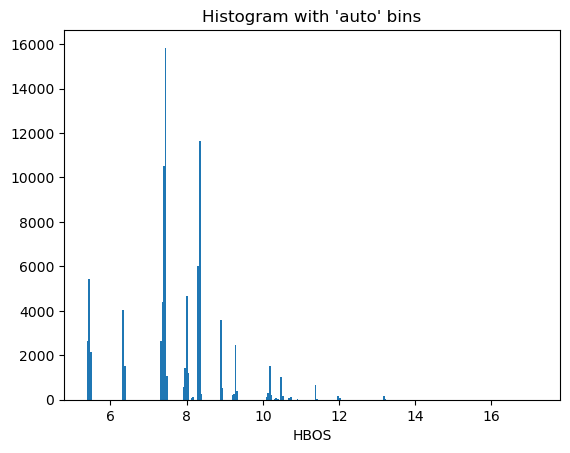

In [45]:
plt.hist(y_test_scores, bins='auto')
plt.title("Histogram with 'auto' bins")
plt.xlabel('HBOS')
plt.show()

> Determine a threshold

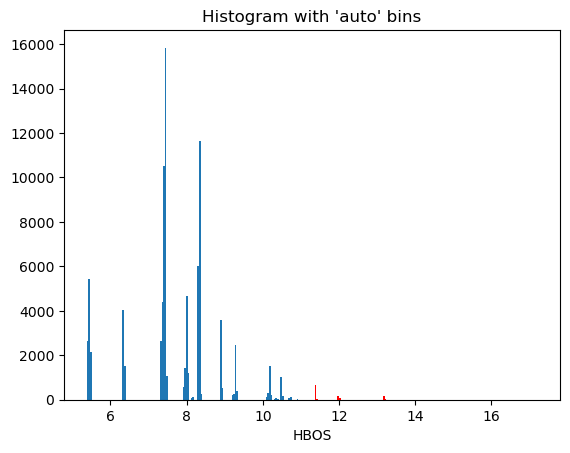

In [46]:
n, bins, patches = plt.hist(y_test_scores, bins='auto')
condition = 11
for i, bin_val in enumerate(bins[:-1]):
    if bin_val > condition:
        patches[i].set_facecolor('red')
plt.title("Histogram with 'auto' bins")
plt.xlabel('HBOS')
plt.show()

In [47]:
import pandas as pd
import numpy as np

# Set display.max_columns to None to display all columns
pd.set_option('display.max_columns', None)

threshold = 11

def descriptive_stat_threshold(df, pred_score, threshold):
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score'] < threshold, 'Normal', 'Outlier')

    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score': 'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100
    stat = df.groupby('Group').mean().round(2).reset_index()
    stat = cnt.merge(stat, left_on='Group', right_on='Group')
    return stat

# Call the function and display the result
descriptive_stat_threshold(x_train, y_train_scores, threshold)

Group   Count    Count %  Transaction_Count_Cardholder  \
0   Normal  349141  98.747907                        916.50   
1  Outlier    4427   1.252093                        562.28   

   Avg_Transaction_Amount_Vendor  Transaction_Count_Vendor  \
0                         405.90                   1848.12   
1                        1813.76                   1955.87   

   Avg_Transaction_Amount_Merchant_Category  \
0                                    424.96   
1                                    442.46   

   Transaction_Amount_to_Count_Ratio  Transaction_Amount_to_Vendor_Ratio  \
0                               2.91                               75.81   
1                              84.06                              525.30   

   Transaction_Amount_to_Category_Ratio  Avg_Transaction_Count_Month  \
0                                  0.95                     37180.88   
1                                  4.68                     37038.10   

   Transaction_Amount_to_Month_Ratio  Transaction_Amount_to_Day_Ratio  \
0                               0.01                             0.01   
1                               0.09                             0.09   

   Transaction_Amount_to_Year_Ratio  \
0                              0.00   
1                              0.02   

   Transaction_Amount_vs_Transaction_Type_Ratio  \
0                                 -1.868767e+11   
1                                  5.310000e+00   

   Transaction_Amount_vs_Merchant_Median_Ratio  \
0                                       300.16   
1                                     19891.95   

   Transaction_Amount_Category_Low  Transaction_Amount_Category_Medium  \
0                             0.49                                0.33   
1                             0.00                                0.61   

   Day_of_Week_Monday  Day_of_Week_Saturday  Day_of_Week_Sunday  \
0                0.14                  0.06                0.01   
1                0.00                  0.21                0.78   

   Day_of_Week_Thursday  Day_of_Week_Tuesday  Day_of_Week_Wednesday  \
0                   0.2                  0.2                   0.21   
1                   0.0                  0.0                   0.00   

   Anomaly_Score  
0           7.62  
1          11.86

**Features Summary:**

1. `Transaction_Count_Cardholder`: Normal are usually with high number of transaction for daily used, while anomaly with less amount of transactions. In business sense, frauds are often happen to be less transactions to gain large amount of money out of pocket.

2. `Avg_Transaction_Amount_Vendor`: This feature calculates the average transaction amount for each vendor, enabling the assessment of vendor-specific spending behavior. In normal circumstances, one would expect to see a relatively low average transaction amount for each vendor, as most transactions are modest in size. However, an anomaly may be flagged when there is a notably high average transaction amount for a particular vendor. This could indicate irregular spending behavior, potentially associated with fraud or unusual purchasing habits.

3. `Transaction_Count_Vendor`: This feature quantifies the popularity of each vendor based on transaction counts, aiding in the identification of unusually popular or unpopular vendors. In a typical scenario, both normal and outlier transaction counts may appear quite similar, making it challenging to distinguish between them. This could mean that this feature alone might not provide significant insights into potential anomalies. Additional context and analysis might be needed to detect irregular patterns related to vendor popularity.

4. `Avg_Transaction_Amount_Merchant_Category`: This feature assesses the average transaction amounts within specific merchant categories, unveiling spending patterns. Similar to the "Transaction_Count_Vendor" feature, the normal and outlier groups may exhibit close similarities in typical situations. This closeness can make it challenging to distinguish between normal and outlier transactions based solely on this feature. For a more effective anomaly detection, additional contextual information and complementary features may be necessary to unveil irregular spending patterns.

5. `Transaction_Amount_to_Count_Ratio`: In normal scenarios, you would typically observe a relatively low "Transaction_Amount_to_Count_Ratio," indicating that transactions are generally of smaller value and are conducted frequently. However, anomalies may stand out with very large "Transaction_Amount_to_Count_Ratio". This pattern suggests that there is a significant amount of money involved in a relatively low number of transactions, which could indeed be indicative of fraudulent activity.

6. `Transaction_Amount_to_Vendor_Ratio`: This feature compares transaction amounts to vendor popularity, helping to identify unusual spending relative to vendor popularity. Much like the "Transaction_Amount_to_Count_Ratio" this feature evaluates the correlation between transaction amount and another variable, in this case, vendor popularity. In normal cases, you might expect to see a typical range for this ratio, indicating that transaction amounts align with vendor popularity. However, anomalies would manifest as significant deviations from this expected pattern, implying unusual spending concerning the popularity of the vendor.

7. `Transaction_Amount_to_Category_Ratio`: This feature assesses the transaction amount relative to the merchant category, enabling the detection of unusual spending within specific categories. Much like the "Transaction_Amount_to_Vendor_Ratio" it involves examining the relationship between transaction amounts and another variable. In normal circumstances, you would expect the ratio to fall within a typical range, signifying that transaction amounts align with the specific merchant category. However, anomalies would occur when there are significant deviations from this expected pattern, indicating unusual spending patterns within specific merchant categories.

8. `Avg_Transaction_Count_Month`: In the normal group, it may indeed be challenging to distinguish it from the outlier group, as the differences might be relatively small. The closeness of the normal and outlier groups in this context suggests that this feature alone may not provide a strong basis for detecting significant anomalies. Additional factors or analysis may be needed to uncover more pronounced seasonal or monthly trends.

9. `Transaction_Amount_to_Month_Ratio`: Similar to "Avg_Transaction_Count_Month" this feature looks at monthly trends. However, what sets it apart is that anomalies are typically characterized by higher "Transaction_Amount_to_Month_Ratio" compared to the normal group. In other words, anomalies tend to involve a greater deviation from the typical monthly spending patterns, with potentially higher transaction amounts in certain months, which can be indicative of unusual or irregular spending behavior.

10. `Transaction_Amount_to_Day_Ratio`: Much like the "Transaction_Amount_to_Month_Ratio" anomalies in this context tend to be characterized by a higher "Transaction_Amount_to_Day_Ratio" compared to the normal group. In other words, anomalies are associated with a greater deviation from the typical daily spending patterns, potentially involving higher transaction amounts on specific days, which can be an indicator of unusual or irregular spending behavior.

11. `Transaction_Amount_to_Year_Ratio`: Like the "Transaction_Amount_to_Day_Ratio" anomalies in this context are often characterized by higher "Transaction_Amount_to_Year_Ratio" compared to the normal group. Anomalies indicate a greater deviation from typical year-specific spending patterns, potentially involving higher transaction amounts in specific years, which can be a sign of unusual or irregular spending behavior.

12. `Transaction_Amount_vs_Transaction_Type_Ratio`: In this case, the normal group typically exhibits lower values for this ratio, while the outlier group tends to have larger values. This means that anomalies are often characterized by a significant deviation from the typical transaction amount patterns associated with different transaction types, suggesting unusual spending behavior.

13. `Transaction_Amount_vs_Merchant_Median_Ratio`: In this case, normal transactions are associated with lower "Transaction Amount vs Merchant Median Ratio" while anomaly transactions tend to exhibit higher values for this ratio. Anomalies are marked by significant deviations from the typical transaction amount patterns in relation to the median transaction amount within specific merchant categories, indicating unusual spending behavior.

14. `Transaction_Amount_Category`: This feature categorizes transactions into "Low," "Medium," and "High" to detect shifts in spending behavior. It's relatively straightforward to identify anomalies using this feature. Typically, the normal group exhibits a higher frequency of transactions in the "Low" category, signifying smaller transaction amounts that are more common. Conversely, anomalies are marked by a higher frequency of transactions in the "High" category, indicating a prevalence of larger transaction amounts, which can be indicative of unusual spending behavior.

15. `Day_of_Week`: This feature examines transaction frequency patterns across days of the week, facilitating the identification of unusual trends. It's observable that anomalies often exhibit higher transaction amounts on Saturdays and Sundays compared to the normal group. This trend may signify that unusual or irregular spending behavior is more prevalent on weekends, which could be indicative of potential anomalies or fraud activity.

## Section 5:  Using ECODs (Elliptic Envelope for Cluster-Based Outlier Detection)<a class="anchor" id="section-5"></a>

> Import the necessary libraries

In [48]:
#pip install pyod
import pandas as pd
import numpy as np
from pyod.models.ecod import ECOD
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

> Prepare dataframe for modeling and data split

In [49]:
selected_features = [
    'Amount','Transaction_Count_Cardholder', 'Avg_Transaction_Amount_Vendor',
    'Transaction_Count_Vendor','Avg_Transaction_Amount_Merchant_Category',
    'Transaction_Amount_to_Count_Ratio','Transaction_Amount_to_Vendor_Ratio',
    'Transaction_Amount_to_Category_Ratio','Avg_Transaction_Count_Month',
    'Transaction_Amount_to_Month_Ratio','Transaction_Amount_to_Day_Ratio',
    'Transaction_Amount_to_Year_Ratio','Transaction_Amount_vs_Transaction_Type_Ratio', 
    'Transaction_Amount_vs_Merchant_Median_Ratio','Transaction_Amount_Category', 'Day_of_Week'
]

categorical_features = ['Transaction_Amount_Category', 'Day_of_Week']  # Categorical features


df_model = df[selected_features]

# Perform one-hot encoding for the categorical features
df_model = pd.get_dummies(df_model, columns=categorical_features, drop_first=True)
df_model

Amount  Transaction_Count_Cardholder  Avg_Transaction_Amount_Vendor  \
0         890.00                           229                     715.555556   
1         368.96                           229                     214.383270   
2         165.82                           291                     163.750339   
3          96.39                           291                      62.405600   
4         125.96                            71                     144.875697   
...          ...                           ...                            ...   
442453    992.00                          1629                    5460.217273   
442454   2415.00                          1629                    1307.045455   
442455    177.50                          1629                     247.244264   
442456  32457.00                          1629                    1830.477778   
442457   4714.07                          1629                    7521.371220   

        Transaction_Count_Vendor  Avg_Transaction_Amount_Merchant_Category  \
0                              9                                480.051482   
1                            159                                389.172289   
2                            118                                676.519181   
3                           2548                                 74.121967   
4                           1450                                204.915215   
...                          ...                                       ...   
442453                        11                                725.072467   
442454                        44                                633.644908   
442455                       258                                514.318754   
442456                        27                                647.994093   
442457                        41                                417.178636   

        Transaction_Amount_to_Count_Ratio  Transaction_Amount_to_Vendor_Ratio  \
0                                3.886463                           98.888889   
1                                1.611179                            2.320503   
2                                0.569828                            1.405254   
3                                0.331237                            0.037830   
4                                1.774085                            0.086869   
...                                   ...                                 ...   
442453                           0.608963                           90.181818   
442454                           1.482505                           54.886364   
442455                           0.108963                            0.687984   
442456                          19.924494                         1202.111111   
442457                           2.893843                          114.977317   

        Transaction_Amount_to_Category_Ratio  Avg_Transaction_Count_Month  \
0                                   1.853968                        37635   
1                                   0.948063                        37635   
2                                   0.245108                        37635   
3                                   1.300424                        37635   
4                                   0.614693                        37635   
...                                      ...                          ...   
442453                              1.368139                        37955   
442454                              3.811283                        37955   
442455                              0.345117                        37955   
442456                             50.088420                        37955   
442457                             11.299884                        37955   

        Transaction_Amount_to_Month_Ratio  Transaction_Amount_to_Day_Ratio  \
0                                0.023648                         0.010239   
1                                0.009804     

In [50]:
# Fill all NaN values
df_model = df_model.fillna(0)
x = df_model.drop('Amount',axis = 1)
y = df_model['Amount']

# Split Train and Test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

# Clean the data
def clean_data(x, y):
    # Remove rows with NaN and -inf values
    is_finite = np.isfinite(x).all(axis=1)
    x_cleaned = x[is_finite]
    y_cleaned = y[is_finite]
    return x_cleaned, y_cleaned

x_train, y_train = clean_data(x_train, y_train)
x_test, y_test = clean_data(x_test, y_test)

> Fit in ECOD model

In [51]:
ecod = ECOD(contamination=0.05)
ecod.fit(x_train)

# Training data
y_train_scores = ecod.decision_function(x_train)
y_train_pred = ecod.predict(x_train)

# Test data
y_test_scores = ecod.decision_function(x_test)
y_test_pred = ecod.predict(x_test)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , ecod.threshold_)

print("The training data:", count_stat(y_train_pred))
print("The testing data:", count_stat(y_test_pred))

The threshold for the defined comtanimation rate: 39.95199040672356
The training data: {0: 335889, 1: 17679}
The testing data: {0: 84064, 1: 4337}


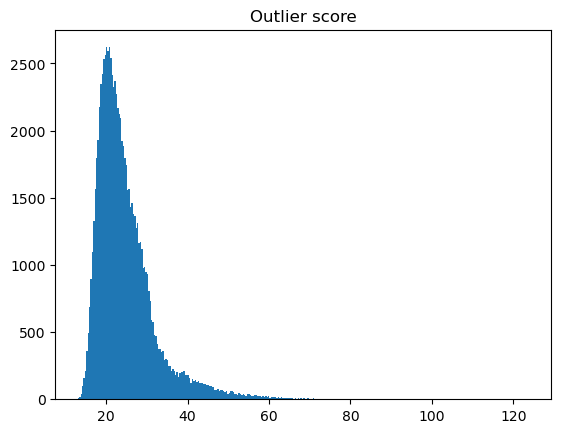

In [52]:
plt.hist(y_test_scores, bins='auto')
plt.title("Outlier score")
plt.show()

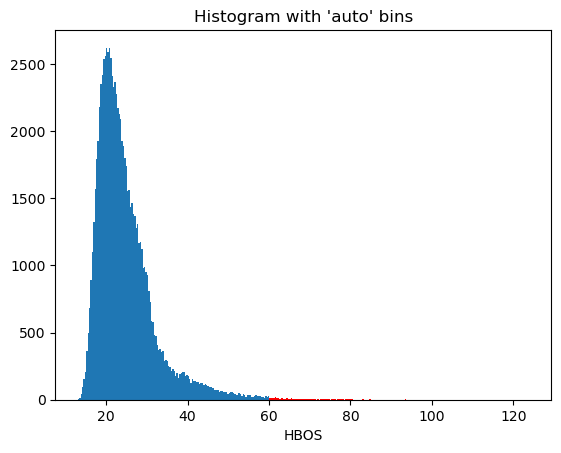

In [53]:
n, bins, patches = plt.hist(y_test_scores, bins='auto')
condition = 60
for i, bin_val in enumerate(bins[:-1]):
    if bin_val > condition:
        patches[i].set_facecolor('red')
plt.title("Histogram with 'auto' bins")
plt.xlabel('HBOS')
plt.show()

> Set a threshold to 60

In [54]:
threshold = 60

def descriptive_stat_threshold(df,pred_score, threshold):
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100
    stat = df.groupby('Group').mean().round(2).reset_index()
    stat = cnt.merge(stat, left_on='Group',right_on='Group')
    return (stat)

descriptive_stat_threshold(x_train,y_train_scores, threshold)

Group   Count   Count %  Transaction_Count_Cardholder  \
0   Normal  352134  99.59442                        908.55   
1  Outlier    1434   0.40558                       1773.49   

   Avg_Transaction_Amount_Vendor  Transaction_Count_Vendor  \
0                         384.39                   1855.10   
1                       10033.93                    465.29   

   Avg_Transaction_Amount_Merchant_Category  \
0                                    424.06   
1                                    701.12   

   Transaction_Amount_to_Count_Ratio  Transaction_Amount_to_Vendor_Ratio  \
0                               2.67                               69.59   
1                             310.79                             2989.35   

   Transaction_Amount_to_Category_Ratio  Avg_Transaction_Count_Month  \
0                                  0.93                     37180.05   
1                                 18.88                     36943.35   

   Transaction_Amount_to_Month_Ratio  Transaction_Amount_to_Day_Ratio  \
0                               0.01                             0.01   
1                               0.45                             0.22   

   Transaction_Amount_to_Year_Ratio  \
0                              0.00   
1                              0.07   

   Transaction_Amount_vs_Transaction_Type_Ratio  \
0                                 -3.198727e+11   
1                                  3.304862e+13   

   Transaction_Amount_vs_Merchant_Median_Ratio  \
0                                       276.52   
1                                     66586.45   

   Transaction_Amount_Category_Low  Transaction_Amount_Category_Medium  \
0                             0.49                                0.34   
1                             0.61                                0.00   

   Day_of_Week_Monday  Day_of_Week_Saturday  Day_of_Week_Sunday  \
0                0.14                  0.06                0.02   
1                0.18                  0.04                0.02   

   Day_of_Week_Thursday  Day_of_Week_Tuesday  Day_of_Week_Wednesday  \
0                  0.20                 0.20                    0.2   
1                  0.19                 0.21                    0.2   

   Anomaly_Score  
0          24.70  
1          67.58

**Useful Features Summary:**

1. `Transaction_Count_Cardholder`: Normal are usually with low transaction count might due to normal spending frequency, while anomaly with large amount of transactions. In business sense, frauds activities have to make a lot of transations and high frequency to gain profits.

2. `Avg_Transaction_Amount_Vendor`: In normal circumstances, one would expect to see a relatively low average transaction amount for each vendor, as most transactions are modest in size. However, an anomaly may be flagged when there is a notably high average transaction amount for a particular vendor. This could indicate irregular spending behavior, potentially associated with fraud or unusual purchasing habits.

3. `Transaction_Count_Vendor`: In a typical scenario, normal transaction counts for vendors tend to have a higher frequency. This is because most of the time, cardholders engage in transactions with a variety of vendors for their regular daily expenses. However, anomalies often manifest as transactions with less frequency associated with a specific vendor, which can raise suspicion and is indicative of potentially fraudulent activities. The deviation from the expected frequency of transactions with a particular vendor can be a key indicator of irregular spending behavior.

4. `Avg_Transaction_Amount_Merchant_Category`: In contrast to "Transaction_Count_Vendor," the normal group typically exhibits lower average transaction amounts within specific merchant categories. This is because normal spending behavior often involves smaller, routine purchases in various merchant categories. Conversely, outliers or anomalies are characterized by higher average transaction amounts within specific merchant categories. These deviations from the norm suggest potentially unusual or irregular spending patterns, such as significantly larger expenditures in particular merchant categories.

5. `Transaction_Amount_to_Count_Ratio`: In normal scenarios, you would typically observe a relatively low "Transaction_Amount_to_Count_Ratio," indicating that transactions are generally of smaller value and are conducted frequently. However, anomalies may stand out with very large "Transaction_Amount_to_Count_Ratio". This pattern suggests that there is a significant amount of money involved in a relatively low number of transactions, which could indeed be indicative of fraudulent activity.

6. `Transaction_Amount_to_Vendor_Ratio`: This feature compares transaction amounts to vendor popularity, helping to identify unusual spending relative to vendor popularity. Much like the "Transaction_Amount_to_Count_Ratio" this feature evaluates the correlation between transaction amount and another variable, in this case, vendor popularity. In normal cases, you might expect to see a typical range for this ratio, indicating that transaction amounts align with vendor popularity. However, anomalies would manifest as significant deviations from this expected pattern, implying unusual spending concerning the popularity of the vendor.

7. `Transaction_Amount_to_Category_Ratio`: This feature assesses the transaction amount relative to the merchant category, enabling the detection of unusual spending within specific categories. Much like the "Transaction_Amount_to_Vendor_Ratio" it involves examining the relationship between transaction amounts and another variable. In normal circumstances, you would expect the ratio to fall within a typical range, signifying that transaction amounts align with the specific merchant category. However, anomalies would occur when there are significant deviations from this expected pattern, indicating unusual spending patterns within specific merchant categories.

8. `Transaction_Amount_vs_Transaction_Type_Ratio`: In this case, the normal group typically exhibits lower values for this ratio, while the outlier group tends to have larger values. This means that anomalies are often characterized by a significant deviation from the typical transaction amount patterns associated with different transaction types, suggesting unusual spending behavior. The results were the same as HBOs.

9. `Transaction_Amount_vs_Merchant_Median_Ratio`: In this case, normal transactions are associated with lower "Transaction Amount vs Merchant Median Ratio" while anomaly transactions tend to exhibit higher values for this ratio. Anomalies are marked by significant deviations from the typical transaction amount patterns in relation to the median transaction amount within specific merchant categories, indicating unusual spending behavior.